In [180]:
import pandas as pd
import numpy as numpy
import pylab
import matplotlib.pyplot as mlpt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale

#To read the CSV file
weight_dataframe=pd.read_csv('C:\\Users\\kp\\Pictures\\Assignments\\Simple Linear Regression\\calories_consumed.csv')

#TO derive the number of rows and columns the given data set has
print("Dataframe Shape: ",weight_dataframe.shape)

#Assigning the columns and labels to X,Y
X=weight_dataframe['Calories Consumed'].values.reshape(-1, 1)
y=weight_dataframe['Weight gained (grams)'].values.reshape(-1, 1)

#To split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Dataframe Shape:  (14, 2)


In [181]:
#To train the model
regression=LinearRegression(normalize=True)
regression.fit(X_train,y_train)

#To retrieve the intercept:
print(regression.intercept_)
#For retrieving the slope:
print(regression.coef_)

#For predicting the values
y_pred = regression.predict(X_test)
print(y_pred)

#To create a new data frame.
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

#To predict the mean values.
print('Mean Absolute Error by Sklearn Model:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error by Sklearn Model:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error by Sklearn Model:', numpy.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[-693.19933385]
[[0.44515507]]
[[553.23486188]
 [-69.98223599]
 [419.68834091]]
   Actual   Predicted
0     600  553.234862
1     128  -69.982236
2     300  419.688341
Mean Absolute Error by Sklearn Model: 121.47857167204756
Mean Squared Error by Sklearn Model: 18569.747619585934
Root Mean Squared Error by Sklearn Model: 136.2708612271381


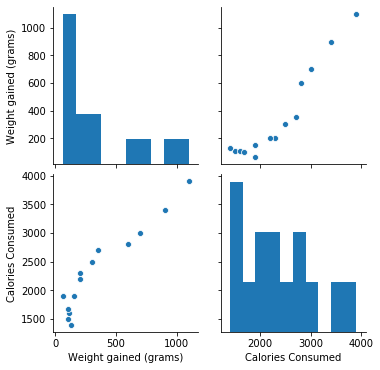

In [182]:
# Building the Model using StatsModels

# Scatter plot between the variables along with histograms
sns.pairplot(weight_dataframe)
mlpt.show() # Predictor and Target Variables doesnt seem to be normally Distributed

#Dropping records which are too sensitive for the regressor to learn the pattern(Outliers) by Influencer Plot
weight_dataframe.drop(weight_dataframe.index[[9,2]],axis=0,inplace=True)

In [183]:
#Transforming the predictor variable values
weight_dataframe['Calories Consumed']=weight_dataframe['Calories Consumed'].transform(func=scale)


regressor=smf.ols("Q('Weight gained (grams)')~Q('Calories Consumed')",data=weight_dataframe).fit()

#Summary
print(regressor.summary())

preds=regressor.predict(weight_dataframe['Calories Consumed'])

                                OLS Regression Results                                
Dep. Variable:     Q('Weight gained (grams)')   R-squared:                       0.773
Model:                                    OLS   Adj. R-squared:                  0.751
Method:                         Least Squares   F-statistic:                     34.12
Date:                        Sun, 03 May 2020   Prob (F-statistic):           0.000164
Time:                                08:46:20   Log-Likelihood:                -71.511
No. Observations:                          12   AIC:                             147.0
Df Residuals:                              10   BIC:                             148.0
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\kp\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


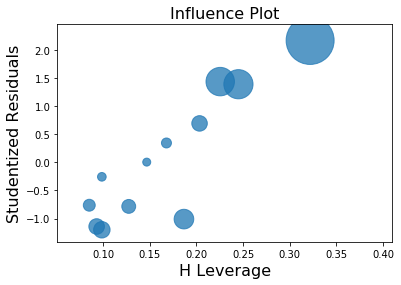

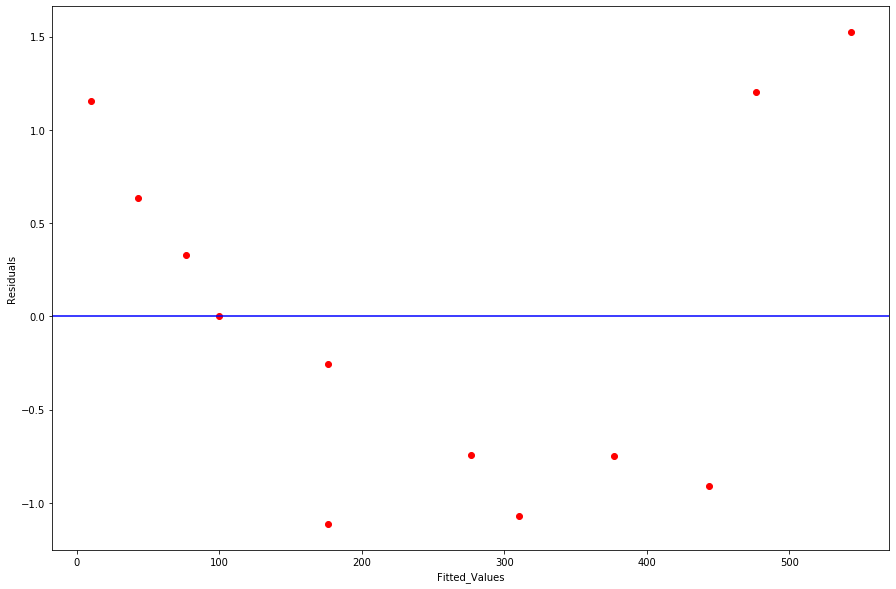

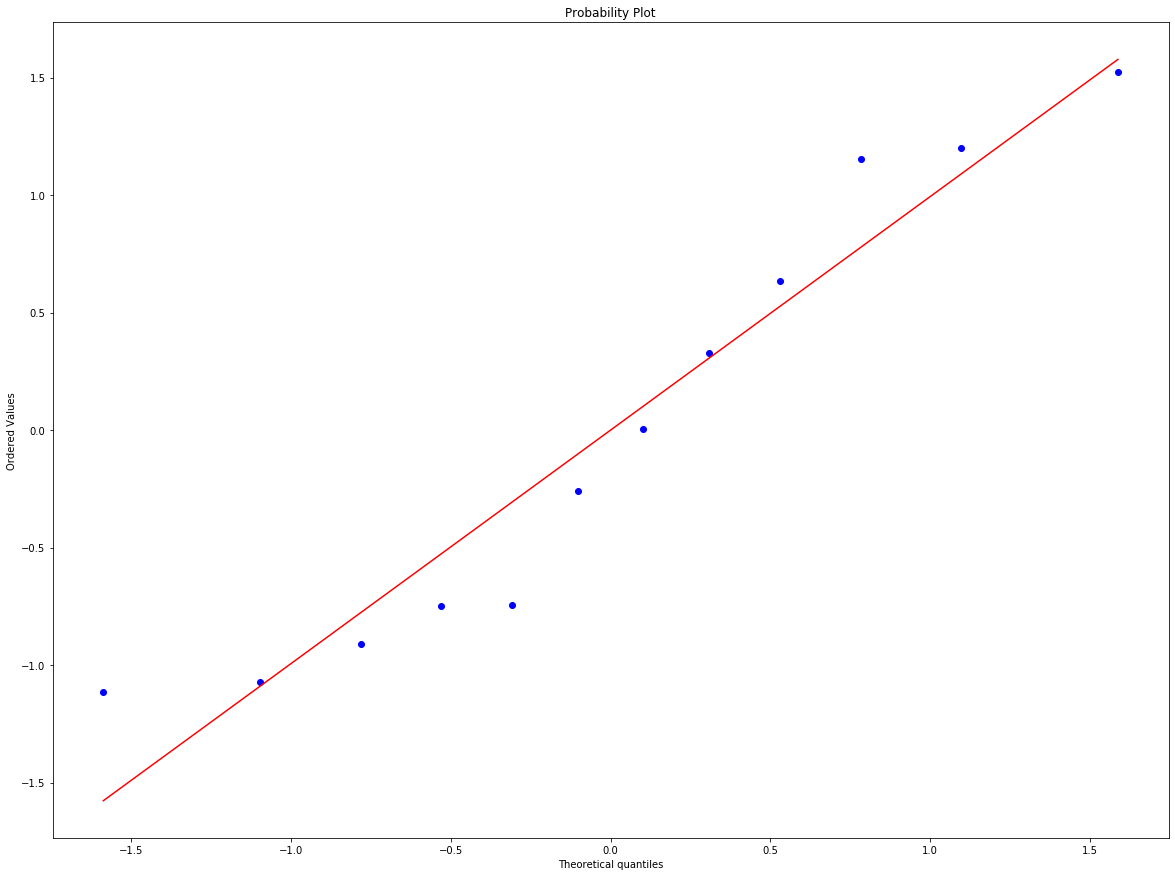

In [184]:
sm.graphics.influence_plot(regressor,figsize=(15,10))
mlpt.show()

# Homoscedasticity : Error term being same across all values of independent variables
# Fitted Values Vs Residuals
mlpt.figure(figsize=(15,10))
mlpt.scatter(preds,regressor.resid_pearson,c="r"),mlpt.axhline(y=0,color='blue');mlpt.xlabel("Fitted_Values");mlpt.ylabel("Residuals")
mlpt.show()

#Normality Test for Residuals
#In Order to have a Model's good fit it is important to have the Residuals follow a Normal Distribution Pattern

# Normal Distribution Check using Q-Q plot
mlpt.figure(figsize=(20,15))
st.probplot(regressor.resid_pearson, dist="norm", plot=pylab) #Residuals aren't normally distributed
mlpt.show()

In [185]:
#To predict the mean values.
print('Mean Absolute Error by Stats Model:', metrics.mean_absolute_error(weight_dataframe['Weight gained (grams)'],preds))  
print('Mean Squared Error by Stats Model:', metrics.mean_squared_error(weight_dataframe['Weight gained (grams)'],preds))  
print('Root Mean Squared Error by Stats Model:', numpy.sqrt(metrics.mean_squared_error(weight_dataframe['Weight gained (grams)'],preds)))

#Conclusion: Transforming the predictor variable to log/sqrt/normalize yields less R-Squared Value and High RMSE value so used 
#scale to standard the predictor values and yields better R-Squared Value and low RMSE value compared to other Transformations
# Seems like Statsmodels OLS does better job than Sklearn LinearRegression 

Mean Absolute Error by Stats Model: 82.88249595441066
Mean Squared Error by Stats Model: 8783.15443956651
Root Mean Squared Error by Stats Model: 93.71848504732942
